In [1]:
%load_ext autoreload
%autoreload 2

# Initialization
## Hyperparameters for discovery

In [2]:
adsorbate = 'OH'
target_energy = 1.23  # eV
# total_size_limit = 600
initial_training_size = 200
batch_size = 200
quantile_cutoff = 0.95

## Gather validation data

In [3]:
import random
import numpy as np
from gaspy.gasdb import get_adsorption_docs, get_surface_from_doc


docs = get_adsorption_docs(adsorbate)
# docs = random.sample(docs, total_size_limit)
random.shuffle(docs)


def parse_docs(docs):
    '''
    Our testing framework needs us to divide information into features, labels, and surfaces.
    This function will convert a list of docs/dictionaries into these things.
    
    Arg:
        docs    A list of dictionaries from `gaspy.gasdb.get_adsorption_docs`
    Returns:
        features    ...just the `docs` arg
        labels      A list of the 'energy' keys in `docs`
        surfaces    A list of 4-tuples indicating the surfaces of `docs
    '''
    features = docs
    labels = [doc['energy'] for doc in docs]
    surfaces = [get_surface_from_doc(doc) for doc in docs]
    return features, labels, surfaces


training_features, training_labels, training_surfaces = parse_docs(docs[:initial_training_size])
sampling_features, sampling_labels, sampling_surfaces = parse_docs(docs[initial_training_size:])

successfully loaded your custom FW_config.yaml!
Now pulling adsorption documents...


4072it [00:00, 77036.07it/s]


# Hallucinate
## Initialize

In [4]:
import warnings
from src.discoverers.adsorption.tpotheuristic import TpotHeuristic


# The GASpy fingerprinter will be yelling at us a lot about missing data.
# Good to know in production, but also good to ignore here.
with warnings.catch_warnings():
    warnings.filterwarnings(message='We do not have any energy data for %s on ' % adsorbate, action='ignore')

    # Initialize
    discoverer = TpotHeuristic(target_energy=target_energy,
                               quantile_cutoff=quantile_cutoff,
                               batch_size=batch_size,
                               training_features=training_features,
                               training_labels=training_labels,
                               training_surfaces=training_surfaces,
                               sampling_features=sampling_features,
                               sampling_labels=sampling_labels,
                               sampling_surfaces=sampling_surfaces,
                               init_train=False  # Only for warm starts
                              )

## Run

In [5]:
# The GASpy fingerprinter will be yelling at us a lot about missing data.
# Good to know in production, but also good to ignore here.
with warnings.catch_warnings():
    warnings.filterwarnings(message='You did not initialize the fingerprinter with the ', action='ignore')
    warnings.filterwarnings(message='We do not have any energy data for %s on ' % adsorbate, action='ignore')
    
    discoverer.simulate_discovery()

Generation 1 - Current best internal CV score: -0.07062147668659287
Generation 2 - Current best internal CV score: -0.07015089399186154

Best pipeline: KNeighborsRegressor(RidgeCV(input_matrix), n_neighbors=34, p=2, weights=distance)


Generation 2 - Current best internal CV score: -0.03943154609096951

Best pipeline: KNeighborsRegressor(SelectPercentile(input_matrix, percentile=87), n_neighbors=5, p=2, weights=distance)


Generation 1 - Current best internal CV score: -0.03943154609096951
Generation 2 - Current best internal CV score: -0.03943154609096951

Best pipeline: KNeighborsRegressor(SelectPercentile(input_matrix, percentile=87), n_neighbors=5, p=2, weights=distance)


Generation 1 - Current best internal CV score: -0.03943154609096951
Generation 2 - Current best internal CV score: -0.03943154609096951

Best pipeline: KNeighborsRegressor(SelectPercentile(input_matrix, percentile=87), n_neighbors=5, p=2, weights=distance)


Generation 1 - Current best internal CV score: -0.03943154609096951
Generation 2 - Current best internal CV score: -0.03943154609096951

Best pipeline: KNeighborsRegressor(SelectPercentile(input_matrix, percentile=87), n_neighbors=5, p=2, weights=distance)


Generation 1 - Current best internal CV score: -0.03943154609096951
Generation 2 - Current best internal CV score: -0.03943154609096951

Best pipeline: KNeighborsRegressor(SelectPercentile(input_matrix, percentile=87), n_neighbors=5, p=2, weights=distance)


Generation 1 - Current best internal CV score: -0.03943154609096951
Generation 2 - Current best internal CV score: -0.03943154609096951

Best pipeline: KNeighborsRegressor(SelectPercentile(input_matrix, percentile=87), n_neighbors=5, p=2, weights=distance)


Generation 1 - Current best internal CV score: -0.03943154609096951
Generation 2 - Current best internal CV score: -0.03943154609096951

Best pipeline: KNeighborsRegressor(SelectPercentile(input_matrix, percentile=87), n_neighbors=5, p=2, weights=distance)


Generation 1 - Current best internal CV score: -0.03943154609096951
Generation 2 - Current best internal CV score: -0.03943154609096951

Best pipeline: KNeighborsRegressor(SelectPercentile(input_matrix, percentile=87), n_neighbors=5, p=2, weights=distance)


Generation 1 - Current best internal CV score: -0.03943154609096951
Generation 2 - Current best internal CV score: -0.03943154609096951

Best pipeline: KNeighborsRegressor(SelectPercentile(input_matrix, percentile=87), n_neighbors=5, p=2, weights=distance)


Generation 1 - Current best internal CV score: -0.03943154609096951
Generation 2 - Current best internal CV score: -0.03943154609096951

Best pipeline: KNeighborsRegressor(SelectPercentile(input_matrix, percentile=87), n_neighbors=5, p=2, weights=distance)


Generation 1 - Current best internal CV score: -0.03943154609096951
Generation 2 - Current best internal CV score: -0.03943154609096951

Best pipeline: KNeighborsRegressor(SelectPercentile(input_matrix, percentile=87), n_neighbors=5, p=2, weights=distance)


Generation 1 - Current best internal CV score: -0.03943154609096951
Generation 2 - Current best internal CV score: -0.03943154609096951

Best pipeline: KNeighborsRegressor(SelectPercentile(input_matrix, percentile=87), n_neighbors=5, p=2, weights=distance)


Generation 1 - Current best internal CV score: -0.03943154609096951
Generation 2 - Current best internal CV score: -0.03943154609096951

Best pipeline: KNeighborsRegressor(SelectPercentile(input_matrix, percentile=87), n_neighbors=5, p=2, weights=distance)


Generation 1 - Current best internal CV score: -0.03943154609096951
Generation 2 - Current best internal CV score: -0.03943154609096951

Best pipeline: KNeighborsRegressor(SelectPercentile(input_matrix, percentile=87), n_neighbors=5, p=2, weights=distance)


Generation 1 - Current best internal CV score: -0.03943154609096951
Generation 2 - Current best internal CV score: -0.03943154609096951

Best pipeline: KNeighborsRegressor(SelectPercentile(input_matrix, percentile=87), n_neighbors=5, p=2, weights=distance)


Generation 1 - Current best internal CV score: -0.03943154609096951
Generation 2 - Current best internal CV score: -0.03943154609096951

Best pipeline: KNeighborsRegressor(SelectPercentile(input_matrix, percentile=87), n_neighbors=5, p=2, weights=distance)


Generation 1 - Current best internal CV score: -0.03943154609096951
Generation 2 - Current best internal CV score: -0.03943154609096951

Best pipeline: KNeighborsRegressor(SelectPercentile(input_matrix, percentile=87), n_neighbors=5, p=2, weights=distance)



In [8]:
# Or load the last run
discoverer.load_last_run()

## Analyze

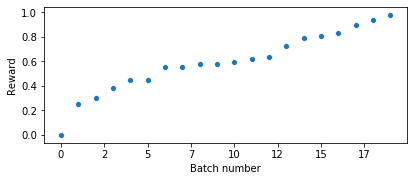

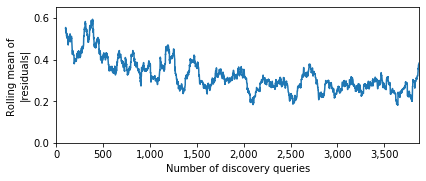

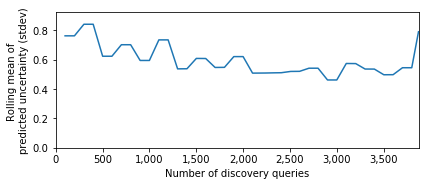

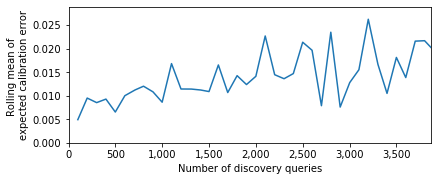

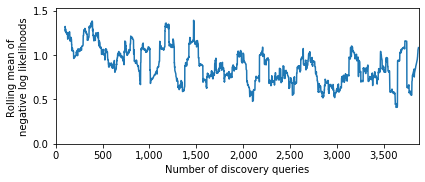

In [15]:
reward_fig, accuracy_fig, uncertainty_fig, calibration_fig, nll_fig = discoverer.plot_performance(window=100)